# **SOCIAL MEDIA SENTIMENT ANALYSIS**

________________________________________________________________________________

In [ ]:
!pip install nltk
import pandas as pd
import warnings
import re
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sentimentdataset.csv to sentimentdataset.csv


In [ ]:
#df = pd.read_csv("sentimentdataset.csv")
df = pd.read_csv(list(uploaded.keys())[0])
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [ ]:
print("Shape:", df.shape)
print("Type:", type(df))
print("Head:\n", df.head())

Shape: (732, 15)
Type: <class 'pandas.core.frame.DataFrame'>
Head:
    Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    


In [ ]:
print(df.columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')


In [ ]:
# Setup stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define function to clean and preprocess text
def preprocess_text(text):
    if pd.isnull(text):
        return ""
    text = str(text).lower()  # Lowercase
    text = re.sub(r"http\S+|www\S+|@\S+|#\S+|\d+", '', text)  # Remove URLs, mentions, numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize
    cleaned = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Remove stopwords + lemmatize
    return ' '.join(cleaned)

In [ ]:
import nltk
nltk.download('punkt_tab')
df['clean_text'] = df['Text'].apply(preprocess_text)

# View before and after
df[['Text', 'clean_text']].head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,Text,clean_text
0,Enjoying a beautiful day at the park! ...,enjoying beautiful day park
1,Traffic was terrible this morning. ...,traffic terrible morning
2,Just finished an amazing workout! 💪 ...,finished amazing workout
3,Excited about the upcoming weekend getaway! ...,excited upcoming weekend getaway
4,Trying out a new recipe for dinner tonight. ...,trying new recipe dinner tonight


________________________________________________________________________________

In [ ]:
# Install TextBlob
!pip install textblob

# Install VADER sentiment analyzer
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00


In [ ]:
# TextBlob for sentiment analysis
from textblob import TextBlob

# VADER Sentiment Analyzer (works well on tweets/slang)
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create VADER analyzer object
analyzer = SentimentIntensityAnalyzer()

In [ ]:
# Function to classify sentiment using TextBlob
def get_sentiment_textblob(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity  # ranges from -1 (negative) to +1 (positive)

    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [ ]:
# Function to classify sentiment using VADER
def get_sentiment_vader(text):
    score = analyzer.polarity_scores(text)  # gives dict with pos, neu, neg, and compound
    compound = score['compound']  # compound is overall sentiment score

    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [ ]:
# Apply TextBlob sentiment
df['sentiment_textblob'] = df['clean_text'].apply(get_sentiment_textblob)

# Apply VADER sentiment
df['sentiment_vader'] = df['clean_text'].apply(get_sentiment_vader)

In [ ]:
# Show original text, cleaned text, and both sentiment outputs
df[['Text', 'clean_text', 'sentiment_textblob', 'sentiment_vader']].head()

,Text,clean_text,sentiment_textblob,sentiment_vader
0,Enjoying a beautiful day at the park! ...,enjoying beautiful day park,Positive,Positive
1,Traffic was terrible this morning. ...,traffic terrible morning,Negative,Negative
2,Just finished an amazing workout! 💪 ...,finished amazing workout,Positive,Positive
3,Excited about the upcoming weekend getaway! ...,excited upcoming weekend getaway,Positive,Positive
4,Trying out a new recipe for dinner tonight. ...,trying new recipe dinner tonight,Positive,Neutral


In [ ]:
# Count how many Positive/Negative/Neutral using TextBlob
print("TextBlob Sentiment Distribution:")
print(df['sentiment_textblob'].value_counts())

# Count how many Positive/Negative/Neutral using VADER
print("\nVADER Sentiment Distribution:")
print(df['sentiment_vader'].value_counts())

TextBlob Sentiment Distribution:
sentiment_textblob
Neutral     334
Positive    288
Negative    110
Name: count, dtype: int64

VADER Sentiment Distribution:
sentiment_vader
Positive    464
Negative    184
Neutral      84
Name: count, dtype: int64


________________________________________________________________________________

In [ ]:
!pip install wordcloud
!pip install matplotlib seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

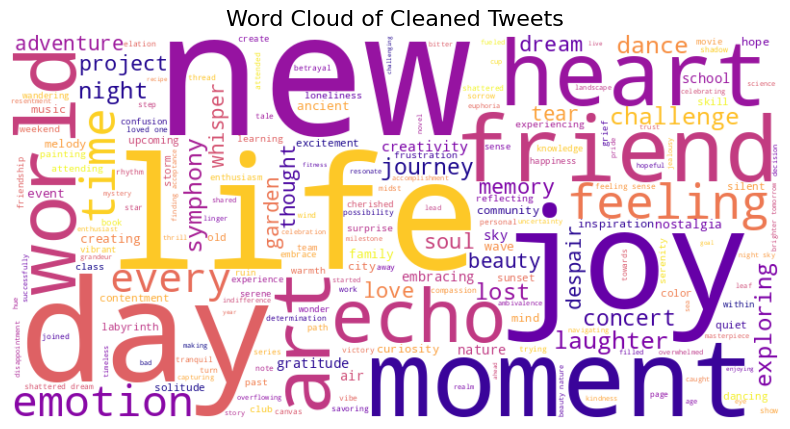

In [ ]:
# Combine all cleaned tweets into one string
all_text = ' '.join(df['clean_text'].dropna().astype(str))

# Create the Word Cloud object
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='plasma'  # colorful!
).generate(all_text)

# Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')  # Render cloud image
plt.axis('off')  # Hide axis ticks
plt.title('Word Cloud of Cleaned Tweets', fontsize=16)
plt.show()

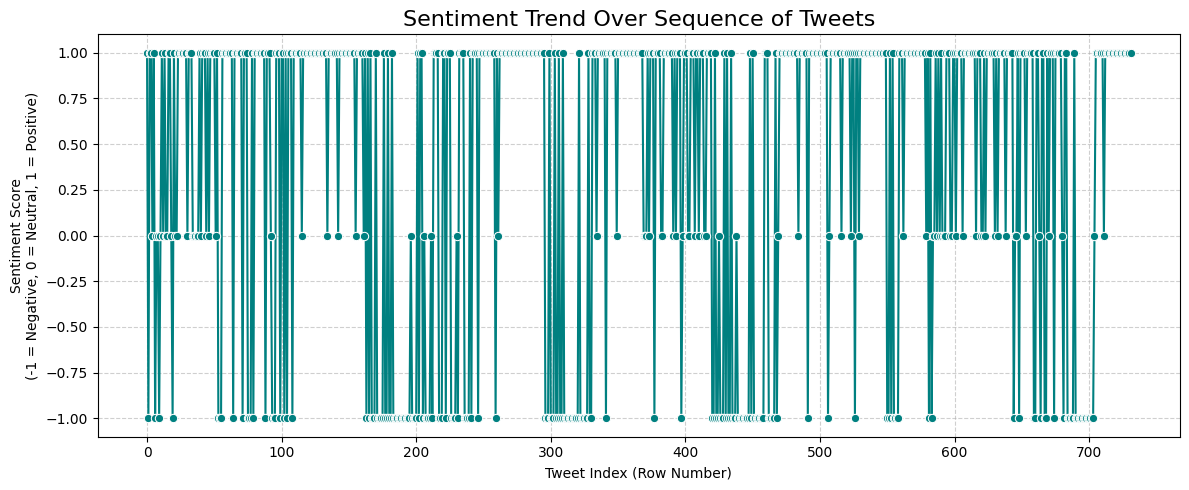

In [ ]:
# Create a copy of sentiment column with row number (as pseudo-time)
df_sentiment = df[['sentiment_vader']].copy()
df_sentiment['index'] = df_sentiment.index

# Convert sentiment to numeric scores for line plotting
# Positive → 1, Neutral → 0, Negative → -1
df_sentiment['sentiment_score'] = df_sentiment['sentiment_vader'].map({
    'Positive': 1,
    'Neutral': 0,
    'Negative': -1
})

# Plot the trend
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_sentiment, x='index', y='sentiment_score', marker='o', color='teal')

# Chart labels and title
plt.title("Sentiment Trend Over Sequence of Tweets", fontsize=16)
plt.xlabel("Tweet Index (Row Number)")
plt.ylabel("Sentiment Score\n(-1 = Negative, 0 = Neutral, 1 = Positive)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# Create a copy to work with
df_sentiment = df[['sentiment_vader']].copy()
df_sentiment['index'] = df_sentiment.index

# Map sentiments to numeric scores
# Positive = 1, Neutral = 0, Negative = -1
df_sentiment['sentiment_score'] = df_sentiment['sentiment_vader'].map({
    'Positive': 1,
    'Neutral': 0,
    'Negative': -1
})

In [ ]:
# Add a rolling average for smoothing trend
df_sentiment['rolling_avg'] = df_sentiment['sentiment_score'].rolling(window=10).mean()

In [ ]:
# Define spike thresholds
POS_SPIKE_THRESHOLD = 0.8   # consistent positive spike
NEG_SPIKE_THRESHOLD = -0.8  # consistent negative spike

# Find positions where spike happens
positive_spikes = df_sentiment[df_sentiment['rolling_avg'] > POS_SPIKE_THRESHOLD]
negative_spikes = df_sentiment[df_sentiment['rolling_avg'] < NEG_SPIKE_THRESHOLD]

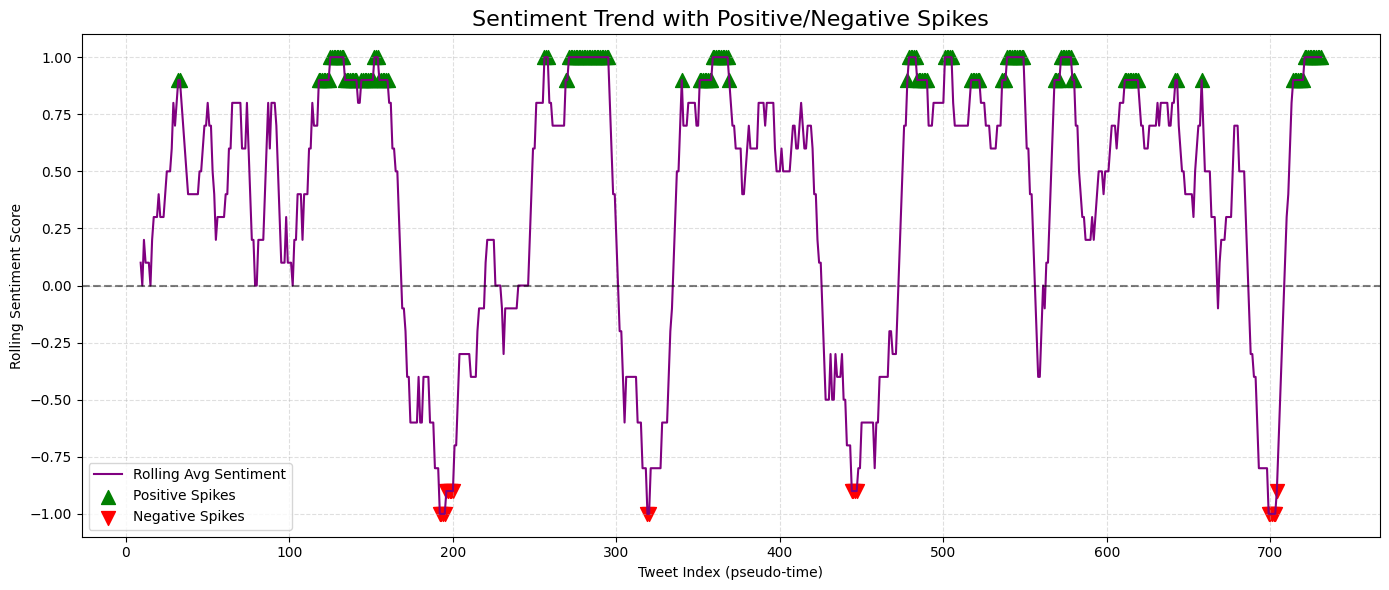

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Plot rolling average sentiment line
sns.lineplot(data=df_sentiment, x='index', y='rolling_avg', label='Rolling Avg Sentiment', color='purple')

# Mark Positive Spikes
plt.scatter(positive_spikes['index'], positive_spikes['rolling_avg'],
            color='green', label='Positive Spikes', marker='^', s=100)

# Mark Negative Spikes
plt.scatter(negative_spikes['index'], negative_spikes['rolling_avg'],
            color='red', label='Negative Spikes', marker='v', s=100)

# Chart details
plt.axhline(0, color='black', linestyle='--', alpha=0.5)
plt.title('Sentiment Trend with Positive/Negative Spikes', fontsize=16)
plt.xlabel('Tweet Index (pseudo-time)')
plt.ylabel('Rolling Sentiment Score')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [ ]:
print("Top Positive Spikes:\n", positive_spikes[['index', 'rolling_avg']].head())
print("\nTop Negative Spikes:\n", negative_spikes[['index', 'rolling_avg']].head())

Top Positive Spikes:
      index  rolling_avg
32      32          0.9
33      33          0.9
118    118          0.9
119    119          0.9
120    120          0.9

Top Negative Spikes:
      index  rolling_avg
192    192         -1.0
193    193         -1.0
194    194         -1.0
195    195         -1.0
196    196         -0.9


________________________________________________________________________________